
### Determining support & resistance levels using mean shift clustering  
The following notebook shows some of this repos functionality,  
including getting and storing tickdata for all tickers available on Dukascopy
A clustering algorithm determines S/R-levels, sorts them, filters them, and plots them.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from getdayrates import getDayRates
from ordercompute import orderCompute

In [7]:
class to_self():
    pass
ts = to_self()
#ts.time = datetime.time
ts.bid = 1.1060
ts.lp = 1.1083
ts.ltp = 1.1059
ts.symbol = 'EURUSD'
ts.quantile = 0.15
ts.n_samples = 2000
ts.date = '2017-03-10'

sr_levels = orderCompute(ts).newSR()

-------------------------
	S/R-levels
-------------------------
1.0572
1.0525
1.0615
1.0597
1.0549

S/R-levels saved at ml_strat/clustering_return/ml_results_EURUSD_2017_03_09_0.15_2000.csv



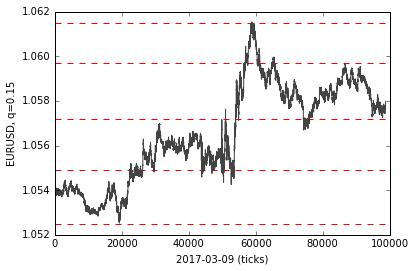

In [9]:
datesplit = ts.date.split('-')
prior_date = '{}-{}-{}'.format(datesplit[0], datesplit[1], str(int(datesplit[2])-1).zfill(2))
input_train_ = getDayRates.getDayRates(ts.symbol, prior_date)
rate_data = getDayRates.importRates(input_train_)

for i in range(len(sr_levels)):
    plt.plot((0, 100000), (sr_levels[i], sr_levels[i]), 'r--')

plt.plot(rate_data, '#434343')

plt.ylabel('EURUSD, q=' + str(ts.quantile))
plt.xlabel(prior_date + ' (ticks)')
plt.savefig('data/visualization/srplot_' + prior_date + '.png')
plt.show()
plt.close()